In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hull-tactical-market-prediction/train.csv
/kaggle/input/hull-tactical-market-prediction/test.csv
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_inference_server.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/templates.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/base_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/relay.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2_grpc.py
/kaggl

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle_evaluation.default_inference_server
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
np.seterr(all='ignore')

pd.set_option('display.max_rows', 100)     
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', None)

## EDA

In [3]:
# load data
train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')
test= pd.read_csv('/kaggle/input/hull-tactical-market-prediction/test.csv')

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Training data shape: (9021, 98)
Test data shape: (10, 99)


In [4]:
train.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                            8015 non-null   f

In [6]:
train.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,7237.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,7405.000000,8015.000000,8015.000000,8015.000000,8015.000000,2052.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,3474.000000,8015.000000,8015.000000,8015.000000,3481.000000,3481.000000,8015.000000,8015.000000,8015.000000,8015.000000,5804.000000,7003.000000,8015.000000,5738.000000,3978.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,7447.000000,7383.000000,7405.000000,8015.000000,8015.000000,8015.000000,8015.000000,8015.000000,5484.000000,8015.000000,3288.000000,8015.000000,7510.000000,8015.000000,8015.000000,6012.000000,8015.000000,8015.000000,2972.000000,8015.000000,8015.000000,7510.000000,8015.000000,8015.000000,8015.000000,7509.000000,8015.000000,7510.000000,8015.000000,4482.000000,9021.000000,9021.000000,9021.000000
mean,4510.000000,0.031593,0.031593,0.047777,0.573994,0.190445,-0.238111,0.045671,0.142667,0.143000,1.564376,0.503676,0.125415,0.118313,0.012279,0.006991,0.486758,-0.047978,-0.009339,0.098024,0.116761,0.504014,0.905390,0.346242,0.016857,0.598541,0.122023,-0.034635,-0.272228,0.265910,0.745320,-0.522922,0.607538,0.551064,0.186341,0.456389,0.706785,0.572773,0.187819,-0.620970,0.058347,-0.288699,0.478585,-0.951588,-0.863647,0.461418,0.231891,0.272509,0.599215,0.085883,0.149234,-0.002284,0.236473,0.231195,0.002751,0.436222,0.382007,0.527662,1.468845,1.260329,-0.020481,0.508742,-0.364950,0.495414,0.500406,0.001178,0.052918,0.249174,1.543061,0.393674,0.241018,0.437959,0.432863,0.265411,0.025082,0.060300,0.456036,0.034151,0.515287,0.494731,0.079207,0.456539,0.325772,-0.003620,0.230551,0.253973,0.111299,0.508960,0.489076,0.506589,0.373584,0.288874,0.145886,0.303203,0.125155,0.000471,0.000107,0.000053
std,2604.282723,0.174923,0.174923,0.213307,0.494522,0.392674,0.425951,0.208783,0.349752,0.350092,0.632544,0.336882,0.245352,0.251567,0.019234,0.012076,0.349147,1.135656,1.157585,1.144661,1.245992,1.422951,1.270370,1.506513,0.041801,0.337284,0.221698,1.910978,1.511888,0.301335,0.245415,1.252119,0.331993,0.306722,1.639333,0.302416,0.257393,0.325655,1.638840,0.996912,1.316043,1.221487,1.394923,0.651200,0.192252,0.273803,0.326578,0.226543,0.344105,1.091028,1.220819,1.092406,1.549889,1.359659,1.018703,0.317700,1.409160,0.327368,0.813670,1.095447,1.085142,0.283680,1.444433,0.288427,0.288163,1.068961,1.150434,1.132135,0.707622,0.385385,1.420260,0.322434,0.324621,0.956397,1.022805,1.006811,0.326317,1.134158,0.288787,0.307013,1.097029,0.328112,0.345797,1.241267,0.315737,0.306309,1.328520,0.305945,0.306060,0.306216,1.151136,0.312905,1.324779,0.350627,1.273912,0.010541,0.000088,0.010558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.325149,0.000661,0.000661,0.000661,0.000661,0.000661,0.000661,-5.130519,-4.302885,-4.131097,-1.826114,-4.675791,-3.308764,-5.374951,0.000661,0.000661,0.000661,-19.918972,-2.457316,0.000661,0.002646,-3.542308,0.000661,0.000661,-4.449235,0.000661,0.003307,0.000661,-4.546619,-2.522870,-4.765828,-3.190249,-2.993367,-1.932110,-1.325950,0.000661,0.000661,0.000661,0.000661,-2.667421,-1.802507,-9.389925,-3.424095,-2.469748,-4.317569,0.000661,-2.831429,0.000661,-1.162766,-2.719004,-1.539300,0.002315,-3.140889,0.043981,0.066138,-1.430121,-0.780115,-3

In [7]:
# Valid columns
train.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'], dtype='object')

## Handling Missing Values

In [8]:
total_cells= train.shape[0] * train.shape[1] # len(train) give num of rows
total_missing=train.isnull().sum().sum()
missing_percentage = (total_missing / total_cells*100)

print(f"Total Cells = {total_cells}")
print(f"Total Missing = {total_missing}")
print(f"Missing Percentage = {missing_percentage}")


Total Cells = 884058
Total Missing = 137675
Missing Percentage = 15.573073259899237


In [9]:
missing_analysis = pd.DataFrame(
    {
        'Feature' : train.columns,
        'Missing count' : train.isnull().sum(),
        'Total Rows' : len(train),
        'Missing Percentage' : (train.isnull().sum()/len(train)*100)
    }
)

missing_analysis.head(10)

,Feature,Missing count,Total Rows,Missing Percentage
date_id,date_id,0,9021,0.0
D1,D1,0,9021,0.0
D2,D2,0,9021,0.0
D3,D3,0,9021,0.0
D4,D4,0,9021,0.0
D5,D5,0,9021,0.0
D6,D6,0,9021,0.0
D7,D7,0,9021,0.0
D8,D8,0,9021,0.0
D9,D9,0,9021,0.0


In [10]:
missing_analysis=missing_analysis[missing_analysis['Missing count']>0].sort_values('Missing Percentage').reset_index(drop=True)
print(f' Feature that contain Missing Values { len(missing_analysis)} : from total Feature { len(train.columns)}')

 Feature that contain Missing Values 85 : from total Feature 98


In [11]:
severe= missing_analysis[missing_analysis['Missing Percentage']> 50]
moderate = missing_analysis[(missing_analysis['Missing Percentage'] > 20) & (missing_analysis['Missing Percentage'] <= 50)]
mild = missing_analysis[missing_analysis['Missing Percentage'] <=20]

print(f"  Serve :     {len(severe)} features")
print(f"  Moderate :  {len(moderate)} features")
print(f"  Mild :     {len(mild)} features")

  Serve :     8 features
  Moderate :  5 features
  Mild :     72 features


In [12]:
# missing value cleaning

target_cols = ["forward_returns", "risk_free_rate", "market_forward_excess_returns"]
feature_cols_train = [c for c in train.columns if c not in target_cols + ["date_id"]]
feature_cols_test = [c for c in test.columns if c not in ["date_id", "is_scored"]]


# missing %
missing_pct = train[feature_cols_train].isna().mean() * 100

serve_threshold = 2      # <2% missing
moderate_threshold = 15  # 2%-15%
# mild >15%

serve_features = missing_pct[missing_pct <= serve_threshold].index.tolist()
moderate_features = missing_pct[(missing_pct > serve_threshold) & (missing_pct <= moderate_threshold)].index.tolist()
mild_features = missing_pct[missing_pct > moderate_threshold].index.tolist()

# print("Serve Features:", serve_features)
# print("Moderate Features:", moderate_features)
# print("Mild Features:", len(mild_features), "features")


# fill serve features → ffill + bfill
train[serve_features] = train[serve_features].ffill().bfill()
test[serve_features] = test[serve_features].ffill().bfill()

# fill moderate features: ffill + bfill + median
for col in moderate_features:
    median_val = train[col].median()
    train[col] = train[col].ffill().bfill().fillna(median_val)
    if col in feature_cols_test: 
        test[col] = test[col].ffill().bfill().fillna(median_val)


# fill mild features: interpolation (linear) + ffill + bfill
for col in mild_features:
    train[col] = train[col].interpolate(method='linear').ffill().bfill()
    if col in feature_cols_test:
        test[col] = test[col].interpolate(method='linear').ffill().bfill()


#  fill with 0
train[feature_cols_train] = train[feature_cols_train].fillna(0)
test[feature_cols_test] = test[feature_cols_test].fillna(0)


# evalute
print("Missing in Train after cleaning:", train[feature_cols_train].isna().sum().sum())
print("Missing in Test after cleaning:", test[feature_cols_test].isna().sum().sum())


Missing in Train after cleaning: 0
Missing in Test after cleaning: 0


## Feature Engineering

### Interaction Feature

In [13]:
# build non-linear relationship between features
def group_mean(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    return df[cols].mean(axis=1)

train['D_mean'] = group_mean(train, 'D')
train['E_mean'] = group_mean(train, 'E')
train['I_mean'] = group_mean(train, 'I')
train['M_mean'] = group_mean(train, 'M')
train['P_mean'] = group_mean(train, 'P')
train['S_mean'] = group_mean(train, 'S')
train['V_mean'] = group_mean(train, 'V')

#  Interaction feature
train['D_V'] = train['D_mean'] * train['V_mean']
train['M_P'] = train['M_mean'] * train['P_mean']
train['S_V'] = train['S_mean'] * train['V_mean']
train['D_M'] = train['D_mean'] * train['M_mean']
train['P_S'] = train['P_mean'] * train['S_mean']
train['V_M'] = train['V_mean'] * train['M_mean']

train.fillna(0, inplace=True)


In [14]:
test['D_mean'] = group_mean(test, 'D')
test['E_mean'] = group_mean(test, 'E')
test['I_mean'] = group_mean(test, 'I')
test['M_mean'] = group_mean(test, 'M')
test['P_mean'] = group_mean(test, 'P')
test['S_mean'] = group_mean(test, 'S')
test['V_mean'] = group_mean(test, 'V')

test['D_V'] = test['D_mean'] * test['V_mean']
test['M_P'] = test['M_mean'] * test['P_mean']
test['S_V'] = test['S_mean'] * test['V_mean']
test['D_M'] = test['D_mean'] * test['M_mean']
test['P_S'] = test['P_mean'] * test['S_mean']
test['V_M'] = test['V_mean'] * test['M_mean']

test.fillna(0, inplace=True)


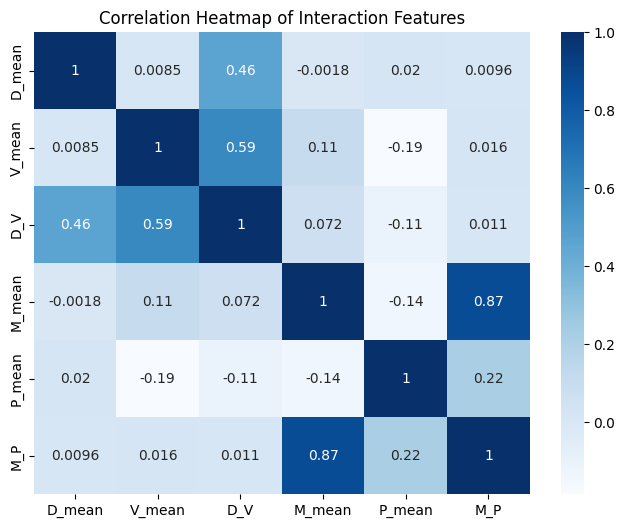

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

interaction_cols = ['D_mean', 'V_mean', 'D_V', 'M_mean', 'P_mean', 'M_P']

plt.figure(figsize=(8,6))
sns.heatmap(train[interaction_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Interaction Features")
plt.show()


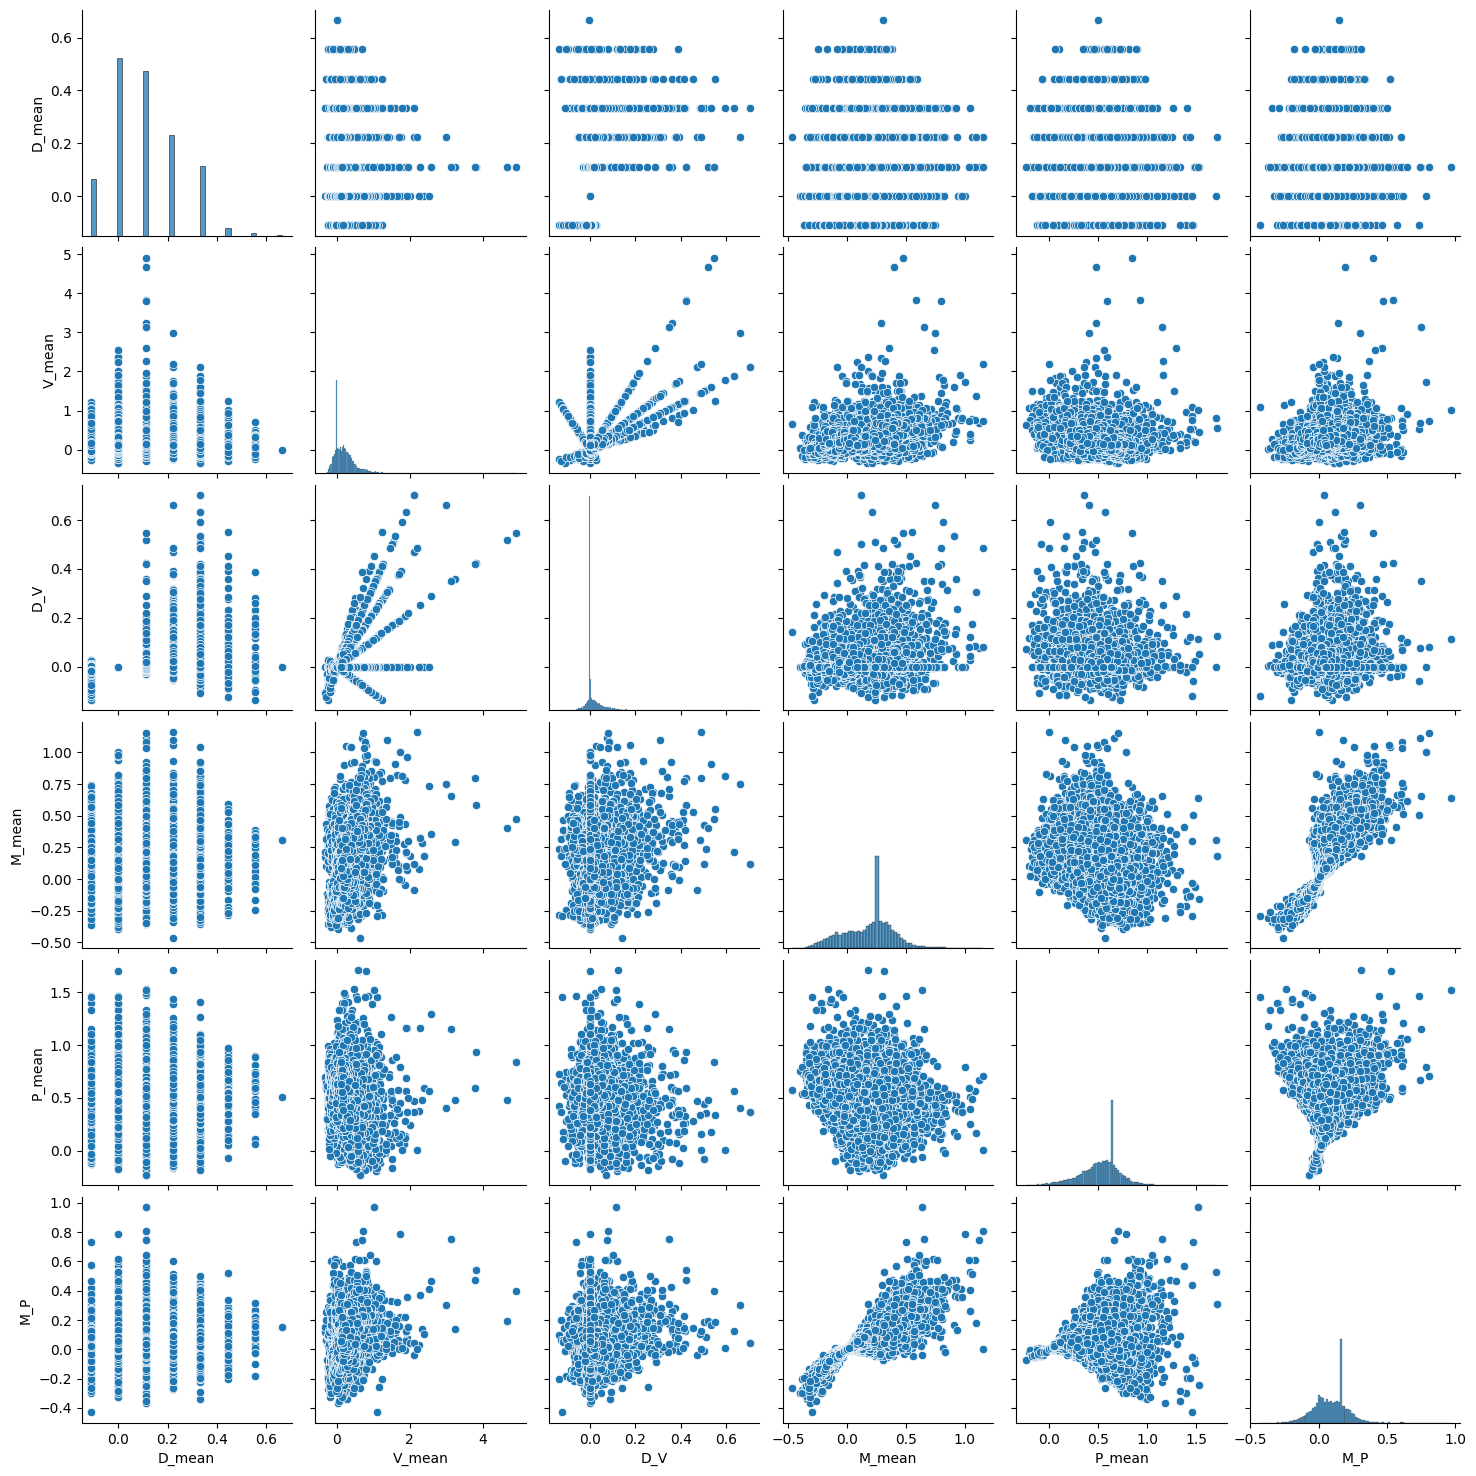

In [16]:
import seaborn as sns

interaction_cols = ['D_mean', 'V_mean', 'D_V', 'M_mean', 'P_mean', 'M_P']

sns.pairplot(train[interaction_cols])
plt.show()


In [17]:
# SAFE FEATURE ENGINEERING + TIME SERIES CV (NO LEAKAGE)

import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# function for features that are safe (no future info)

def create_safe_features(df):
    df = df.copy()
    # Simple ratios and differences 
    df['P_minus_E']      = df['P_mean'] - df['E_mean']
    df['vol_ratio_V1_V13'] = df['V1'] / (df['V13'] + 1e-8)
    df['total_volume']   = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13']].sum(axis=1)
    return df


# Clean data once (before CV)
train = train.apply(pd.to_numeric, errors='coerce')          # Force all columns to numeric
train['date_id'] = train['date_id'].astype(int)              
train = train.dropna(thresh=70, axis=0).reset_index(drop=True)  # Remove very empty rows

print(f"After cleaning → {train.shape[0]} rows (from 9021)")

# Base columns
base_features = [c for c in train.columns if c not in ['date_id', 'forward_returns']]

# TimeSeries CV
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = []
r2_scores   = []

print("\nStarting Cross-Validation (no leakage)...\n")

for fold, (train_idx, valid_idx) in enumerate(tscv.split(train)):
    # print(f"{'='*10} Fold {fold+1}/5 {'='*10}")
    
    # Split into train / valid for this fold
    trn = train.iloc[train_idx].copy()
    val = train.iloc[valid_idx].copy()
    
    # features (no future) 
    trn = create_safe_features(trn)
    val = create_safe_features(val)
    
    #  Lags (only on training part)
    lag_cols = []
    for lag in [1, 2, 3, 5, 7, 14]:
        for col in ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10']:
            col_name = f'{col}_lag{lag}'
            trn[col_name] = trn[col].shift(lag)          
            val[col_name] = trn[col].iloc[-lag]          
            lag_cols.append(col_name)
    
    #  Rolling (only on training part) 
    roll_cols = []
    for window in [3, 7, 14]:
        for col in ['V1','V2','V3','V4','V5']:
            mean_name = f'{col}_roll_mean_{window}'
            std_name  = f'{col}_roll_std_{window}'
            
            trn[mean_name] = trn[col].rolling(window).mean()
            trn[std_name]  = trn[col].rolling(window).std()
            
            # For validation: use the last known rolling value from training
            val[mean_name] = trn[col].rolling(window).mean().iloc[-1]
            val[std_name]  = trn[col].rolling(window).std().iloc[-1]
            
            roll_cols.extend([mean_name, std_name])
    
    # All features we will use 
    features = base_features + lag_cols + roll_cols
    
    # Scaling inside the fold (very important!)
    scaler = StandardScaler()
    trn[features] = scaler.fit_transform(trn[features])   # fit on train only
    val[features] = scaler.transform(val[features])       # transform valid (no fit!)
    
    # Remove rows with NaN created by shift/rolling 
    trn = trn.dropna().reset_index(drop=True)
    val = val.dropna().reset_index(drop=True)
    
    

After cleaning → 9021 rows (from 9021)

Starting Cross-Validation (no leakage)...



## Train Model

## LightGBM

In [18]:
# =====================================================
# SAFE FEATURE ENGINEERING + TIME SERIES CV (NO LEAKAGE)
# =====================================================

import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------------
# 1. Simple function for features that are safe (no future info)
# ------------------------------------------------------------------
def create_safe_features(df):
    df = df.copy()
    # Simple ratios and differences – 100% safe
    df['P_minus_E']      = df['P_mean'] - df['E_mean']
    df['vol_ratio_V1_V13'] = df['V1'] / (df['V13'] + 1e-8)
    df['total_volume']   = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13']].sum(axis=1)
    # Add any other simple calculations you like here
    return df

# ------------------------------------------------------------------
# 2. Clean data once (before CV)
# ------------------------------------------------------------------
train = train.apply(pd.to_numeric, errors='coerce')          # Force all columns to numeric
train['date_id'] = train['date_id'].astype(int)              # Keep date_id as integer
train = train.dropna(thresh=70, axis=0).reset_index(drop=True)  # Remove very empty rows

print(f"After cleaning → {train.shape[0]} rows (from 9021)")

# ------------------------------------------------------------------
# 3. Base columns (everything except target and date_id)
# ------------------------------------------------------------------
base_features = [c for c in train.columns if c not in ['date_id', 'forward_returns']]

# ------------------------------------------------------------------
# 4. TimeSeries CV – the only correct way for this competition
# ------------------------------------------------------------------
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = []
r2_scores   = []

print("\nStarting REAL Cross-Validation (no leakage)...\n")

for fold, (train_idx, valid_idx) in enumerate(tscv.split(train)):
    print(f"{'='*15} Fold {fold+1}/5 {'='*15}")
    
    # Split into train / valid for this fold
    trn = train.iloc[train_idx].copy()
    val = train.iloc[valid_idx].copy()
    
    # ---- Safe simple features (no future) ----
    trn = create_safe_features(trn)
    val = create_safe_features(val)
    
    # ---- Lags (only on training part) ----
    lag_cols = []
    for lag in [1, 2, 3, 5, 7, 14]:
        for col in ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10']:
            col_name = f'{col}_lag{lag}'
            trn[col_name] = trn[col].shift(lag)          # Normal lag on train
            val[col_name] = trn[col].iloc[-lag]          # Use last known value from train (no leak!)
            lag_cols.append(col_name)
    
    # ---- Rolling statistics (only on training part) ----
    roll_cols = []
    for window in [3, 7, 14]:
        for col in ['V1','V2','V3','V4','V5']:
            mean_name = f'{col}_roll_mean_{window}'
            std_name  = f'{col}_roll_std_{window}'
            
            trn[mean_name] = trn[col].rolling(window).mean()
            trn[std_name]  = trn[col].rolling(window).std()
            
            # For validation: use the last known rolling value from training
            val[mean_name] = trn[col].rolling(window).mean().iloc[-1]
            val[std_name]  = trn[col].rolling(window).std().iloc[-1]
            
            roll_cols.extend([mean_name, std_name])
    
    # ---- All features we will use ----
    features = base_features + lag_cols + roll_cols
    
    # ---- Scaling inside the fold (very important!) ----
    scaler = StandardScaler()
    trn[features] = scaler.fit_transform(trn[features])   # fit on train only
    val[features] = scaler.transform(val[features])       # transform valid (no fit!)
    
    # ---- Remove rows with NaN created by shift/rolling ----
    trn = trn.dropna().reset_index(drop=True)
    val = val.dropna().reset_index(drop=True)
    
    # ---- Prepare X and y ----
    X_train = trn[features]
    y_train = trn['forward_returns']
    X_valid = val[features]
    y_valid = val['forward_returns']
    
    # ---- LightGBM model ----
    model = lgb.LGBMRegressor(
        n_estimators=5000,
        learning_rate=0.02,
        num_leaves=64,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        verbosity=-1
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(500)]
    )
    
    # ---- Predict and calculate scores ----
    preds = model.predict(X_valid)
    rmse  = mean_squared_error(y_valid, preds, squared=False)
    r2    = r2_score(y_valid, preds)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold+1} → RMSE: {rmse:.6f} | R²: {r2:.5f}")
    print(f"   Train dates : {trn['date_id'].min()} → {trn['date_id'].max()}")
    print(f"   Valid dates : {val['date_id'].min()} → {val['date_id'].max()}\n")

# ------------------------------------------------------------------
# 5. Final REAL CV score (this is what you will see on Kaggle!)
# ------------------------------------------------------------------
print("="*60)
print("FINAL CROSS-VALIDATION RESULTS (NO LEAKAGE)")
print(f"Average RMSE : {np.mean(rmse_scores):.6f}")
print(f"Average R²   : {np.mean(r2_scores):.5f}")
print("="*60)

After cleaning → 9021 rows (from 9021)

Starting REAL Cross-Validation (no leakage)...

=============== Fold 1/5 ===============
Training until validation scores don't improve for 100 rounds
[500]	valid_0's l2: 1.01145e-05
[1000]	valid_0's l2: 9.84761e-06
[1500]	valid_0's l2: 9.84385e-06
[2000]	valid_0's l2: 9.84381e-06
[2500]	valid_0's l2: 9.84381e-06
[3000]	valid_0's l2: 9.84381e-06
Early stopping, best iteration is:
[2959]	valid_0's l2: 9.84381e-06
Fold 1 → RMSE: 0.003137 | R²: 0.93262
   Train dates : 14 → 1505
   Valid dates : 1506 → 3008

=============== Fold 2/5 ===============
Training until validation scores don't improve for 100 rounds
[500]	valid_0's l2: 9.55865e-07
[1000]	valid_0's l2: 8.96525e-07
[1500]	valid_0's l2: 8.95368e-07
[2000]	valid_0's l2: 8.95341e-07
[2500]	valid_0's l2: 8.9534e-07
[3000]	valid_0's l2: 8.9534e-07
Early stopping, best iteration is:
[3296]	valid_0's l2: 8.9534e-07
Fold 2 → RMSE: 0.000946 | R²: 0.99081
   Train dates : 14 → 3008
   Valid dates : 30

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import lightgbm as lgb

# numeric
train = train.apply(pd.to_numeric, errors='coerce')
train['date_id'] = train['date_id'].astype(int)

train = train.dropna(thresh=70, axis=0).reset_index(drop=True)

print(f" shape after cleaning : {train.shape[0]}")
print(f" date_id: {train['date_id'].min()} | آخر date_id: {train['date_id'].max()}")


feature_cols = [col for col in train.columns if col not in ['date_id', 'forward_returns']]
X = train[feature_cols]
y = train["forward_returns"]

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

rmse_scores = []
r2_scores = []

for fold, (trn_idx, val_idx) in enumerate(tscv.split(X)):
    print(f"\n===== Fold {fold+1}/5 =====")
    print(f"Train dates: {train.iloc[trn_idx]['date_id'].min()} → {train.iloc[trn_idx]['date_id'].max()}")
    print(f"Valid dates: {train.iloc[val_idx]['date_id'].min()} → {train.iloc[val_idx]['date_id'].max()}")

    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        learning_rate=0.03,
        num_leaves=64,
        max_depth=-1,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=5000,
        min_child_samples=20,
        verbosity=-1,
        random_state=42
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(200)]
    )

    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold+1} → RMSE: {rmse:.6f} | R²: {r2:.6f}")

print("\n" + "="*50)
print(f"AVG RMSE: {np.mean(rmse_scores):.6f}")
print(f"AVG R²:   {np.mean(r2_scores):.6f}")
print("="*50)

 shape after cleaning : 9021
 date_id: 0 | آخر date_id: 9020

===== Fold 1/5 =====
Train dates: 0 → 1505
Valid dates: 1506 → 3008
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.00231035
[400]	valid_0's rmse: 0.00230245
Early stopping, best iteration is:
[300]	valid_0's rmse: 0.00228351
Fold 1 → RMSE: 0.002284 | R²: 0.964310

===== Fold 2/5 =====
Train dates: 0 → 3008
Valid dates: 3009 → 4511
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.000934964
[400]	valid_0's rmse: 0.000854798
[600]	valid_0's rmse: 0.000850658
[800]	valid_0's rmse: 0.000851338
Early stopping, best iteration is:
[704]	valid_0's rmse: 0.000846851
Fold 2 → RMSE: 0.000847 | R²: 0.992642

===== Fold 3/5 =====
Train dates: 0 → 4511
Valid dates: 4512 → 6014
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 0.00113954
[400]	valid_0's rmse: 0.00108007
Early stopping, best iteration is:
[365]	valid_0's rmse: 0.0010

In [20]:
trained_columns = X_train.columns.tolist() 

# print(f"{len(trained_columns)} feuture")

test_aligned = pd.DataFrame(columns=trained_columns)

for col in trained_columns:
    if col in test.columns:
        test_aligned[col] = test[col]
    else:
    
        test_aligned[col] = 0   # أو np.nan

test_aligned = test_aligned[trained_columns]

# print(f" {test_aligned.shape[1]} ")

predictions = model.predict(test_aligned)

# submission.parquet
submission = pd.DataFrame({
    'date_id': test['date_id'],
    'forward_returns': predictions
})

submission.to_parquet('submission.parquet', index=False)

print("save submission.parquet!")
print(submission.head())

save submission.parquet!
   date_id  forward_returns
0     8980         0.000125
1     8981         0.000124
2     8982         0.000201
3     8983         0.000268
4     8984         0.000154
